In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df_poke = pd.read_excel('pokemon_data.xlsx')
df_poke

,Unnamed: 0.1,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,3,3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,4,4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,1060,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1061,1061,1061,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1062,1062,1062,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0
1063,1063,1063,713,Avalugg Hisuian Avalugg,Ice,Rock,514,95,127,184,34,36,38,0


In [62]:
x = df_poke.drop(labels='Is_legendary', axis=1)
y = df_poke['Is_legendary'].values

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column_name in x:
    column_dtype = x[column_name].dtype
    if column_dtype == 'object':
        x[column_name] = label_encoder.fit_transform(x[column_name])

df_testinho = pd.DataFrame(x)
display(df_testinho)

,Unnamed: 0.1,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,0,1,97,9,13,318,45,49,49,65,65,45
1,1,1,2,444,9,13,405,60,62,63,80,80,60
2,2,2,3,987,9,13,525,80,82,83,100,100,80
3,3,3,4,127,6,6,309,39,52,43,60,50,65
4,4,4,5,128,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,1060,628,88,14,7,510,110,83,70,112,70,65
1061,1061,1061,705,838,16,2,452,58,75,83,83,113,40
1062,1062,1062,706,362,16,2,600,80,100,100,110,150,60
1063,1063,1063,713,42,11,15,514,95,127,184,34,36,38


In [64]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessador = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['float']))])

x_pre = preprocessador.fit_transform(x)
display(x_pre)

array([[   0,    0,    1, ...,   65,   65,   45],
       [   1,    1,    2, ...,   80,   80,   60],
       [   2,    2,    3, ...,  100,  100,   80],
       ...,
       [1062, 1062,  706, ...,  110,  150,   60],
       [1063, 1063,  713, ...,   34,   36,   38],
       [1064, 1064,  724, ...,   95,   95,   60]], dtype=int64)

In [65]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre,y,random_state=0, test_size=0.3)

In [66]:
from sklearn import tree

classificador_gini = tree.DecisionTreeClassifier(criterion='gini')

classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

[Text(0.48, 0.9444444444444444, 'Total <= 568.5\ngini = 0.155\nsamples = 745\nvalue = [682, 63]\nclass = 0'),
 Text(0.16, 0.8333333333333334, 'Total <= 202.5\ngini = 0.012\nsamples = 671\nvalue = [667, 4]\nclass = 0'),
 Text(0.08, 0.7222222222222222, 'Sp. Atk <= 28.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = 0'),
 Text(0.04, 0.6111111111111112, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = 0'),
 Text(0.12, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.24, 0.7222222222222222, 'HP <= 79.0\ngini = 0.009\nsamples = 663\nvalue = [660, 3]\nclass = 0'),
 Text(0.2, 0.6111111111111112, 'gini = 0.0\nsamples = 503\nvalue = [503, 0]\nclass = 0'),
 Text(0.28, 0.6111111111111112, 'Sp. Atk <= 79.5\ngini = 0.037\nsamples = 160\nvalue = [157, 3]\nclass = 0'),
 Text(0.24, 0.5, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]\nclass = 0'),
 Text(0.32, 0.5, 'Sp. Atk <= 80.5\ngini = 0.079\nsamples = 73\nvalue = [70, 3]\nclass = 0'),
 Text(0.24, 0.388888888888888

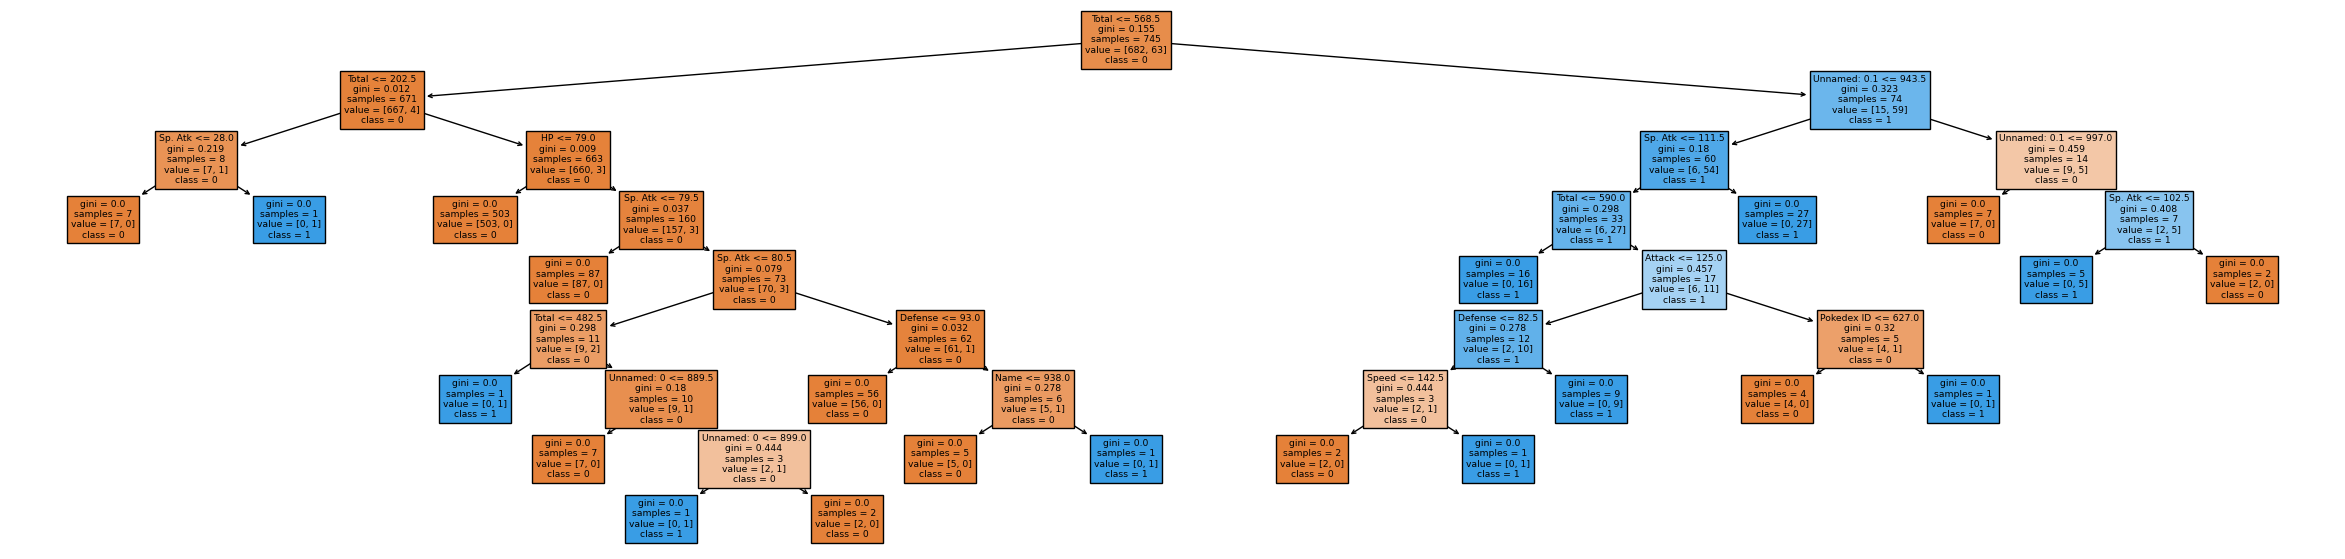

In [67]:
plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_gini,
    feature_names=x.columns.astype(str),
    class_names=classificador_gini.classes_.astype(str),
    filled=True
)

In [68]:
from sklearn.metrics import accuracy_score

resp_treino_gini = classificador_gini.predict(x_treino)

print('Gini:', accuracy_score(y_treino, resp_treino_gini))

Gini: 1.0


<AxesSubplot: >

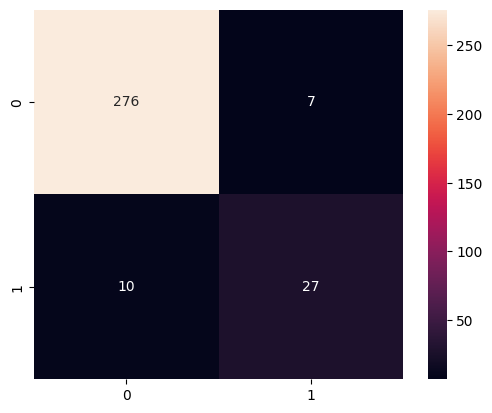

In [69]:
y_pred = classificador_gini.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_gini.classes_, xticklabels = classificador_gini.classes_,fmt = 'd')

In [70]:
path = classificador_gini.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00100216 0.0013285  0.00178971 0.00214765 0.00263982
 0.00383509 0.00479386 0.00898033 0.11204529]
[0.         0.00801725 0.01067424 0.01246395 0.0146116  0.02517089
 0.02900598 0.03379984 0.04278017 0.15482546]


In [71]:
ccp_alphas = ccp_alphas[:-1]

classificadores_prune = []

for ccp_alpha in ccp_alphas:
    classificador_prune = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    classificador_prune.fit(x_treino, y_treino)
    classificadores_prune.append(classificador_prune)
    
    acuracia_treino = [
    classificador_prune.score(x_treino, y_treino) for classificador_prune in classificadores_prune
    ]

    acuracia_teste = [
        classificador_prune.score(x_teste, y_teste) for classificador_prune in classificadores_prune
    ]

In [72]:
classificadores_prune[acuracia_teste.index(max(acuracia_teste))]

DecisionTreeClassifier(ccp_alpha=0.0038350910834132313)

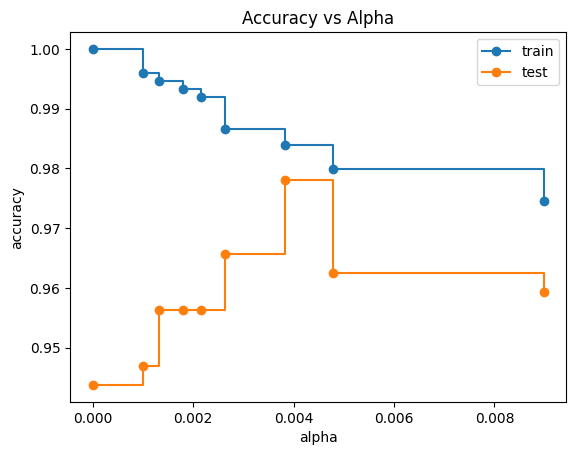

In [73]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas, acuracia_treino, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, acuracia_teste, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:
index_max = acuracia_teste.index(max(acuracia_teste))

print(f"Acurácia CCP Treino: {acuracia_treino[index_max]}")
print(f"Acurácia CCP Teste: {max(acuracia_teste)}")

Acurácia CCP Treino: 0.9838926174496644
Acurácia CCP Teste: 0.978125


[Text(0.3333333333333333, 0.875, 'Total <= 568.5\ngini = 0.155\nsamples = 745\nvalue = [682, 63]\nclass = 0'),
 Text(0.16666666666666666, 0.625, 'gini = 0.012\nsamples = 671\nvalue = [667, 4]\nclass = 0'),
 Text(0.5, 0.625, 'Unnamed: 0 <= 943.5\ngini = 0.323\nsamples = 74\nvalue = [15, 59]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'gini = 0.18\nsamples = 60\nvalue = [6, 54]\nclass = 1'),
 Text(0.6666666666666666, 0.375, 'Unnamed: 0.1 <= 997.0\ngini = 0.459\nsamples = 14\nvalue = [9, 5]\nclass = 0'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = 1')]

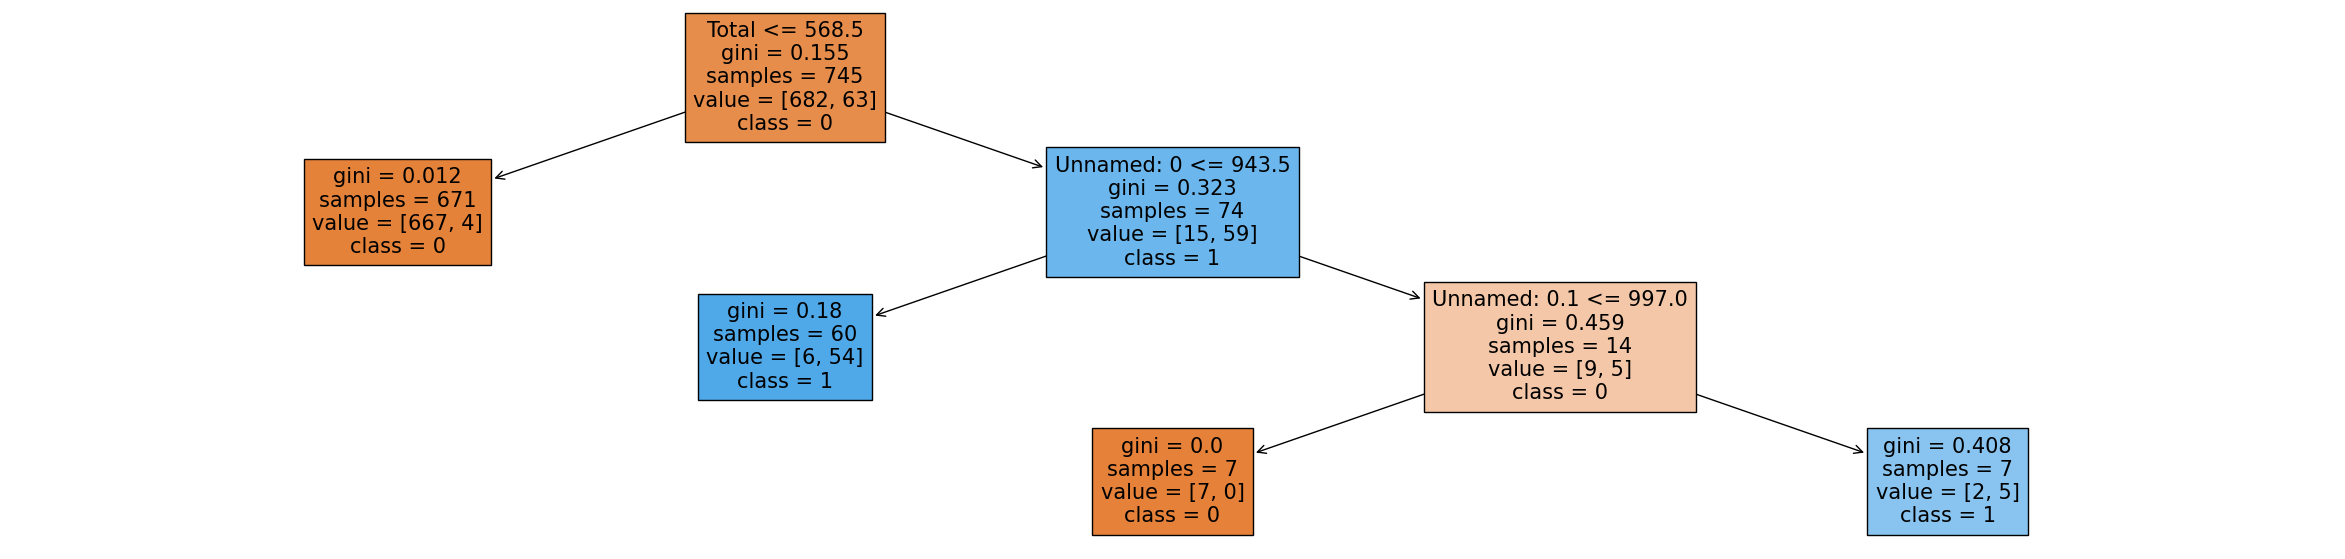

In [75]:
alpha = ccp_alphas[index_max]

classificador_ccp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
classificador_ccp.fit(x_treino, y_treino)

y_pred = classificador_ccp.predict(x_teste)

plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_ccp,
    feature_names=x.columns.astype(str),
    class_names=classificador_ccp.classes_.astype(str),
    filled=True
)

<AxesSubplot: >

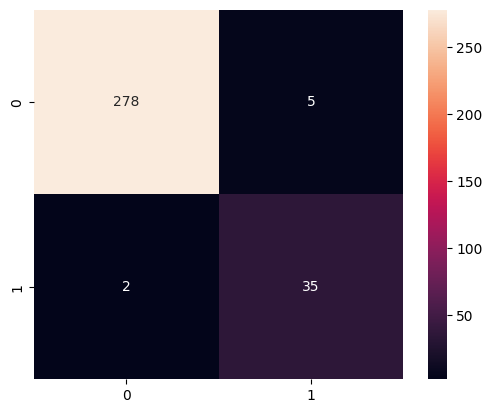

In [76]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_ccp.classes_, xticklabels = classificador_ccp.classes_,fmt = 'd')